# Mosquito Segmentation Tutorial

This tutorial demonstrates how to use the CulicidaeLab library to perform mosquito segmentation on images. We'll cover:

1. Setting up the segmentation model
2. Loading and preprocessing images
3. Running segmentation
4. Visualizing results

First, let's import the necessary libraries:

In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from culicidaelab import MosquitoSegmenter, ModelWeightsManager, MosquitoDetector
from culicidaelab import get_settings

c:\Users\lenova\CascadeProjects\culicidaelab\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Initialize Settings and Segmenter

First, we'll initialize our settings and create a MosquitoSegmenter instance:

In [2]:
# Get settings instance
settings = get_settings()
settings.list_model_types()

['classifier', 'detector', 'segmenter']

In [3]:
ModelWeightsManager(settings).ensure_weights("segmenter")

Weights file found at: C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\segmentation\sam2.1_hiera_tiny.pt


Path('C:/Users/lenova/AppData/Local/culicidaelab/culicidaelab/models/weights/segmentation/sam2.1_hiera_tiny.pt')

In [4]:
model_config = settings.get_config("predictors.segmenter")
model_path = settings.get_model_weights("segmenter")

# Initialize segmenter
segmenter = MosquitoSegmenter(settings=settings, load_model=True)

Weights file found at: C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\segmentation\sam2.1_hiera_tiny.pt


## 2. Load and Preprocess Image

Now let's load a test image:

In [5]:
# Load test image
image_path = str(Path("test_img") / "640px-Aedes_aegypti.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 3. Run Segmentation

Now we can run the segmentation model on our image:

In [6]:
mask = segmenter.predict(image)

## 4. Visualize Results

Finally, let's visualize the segmentation results overlaid on the original image:

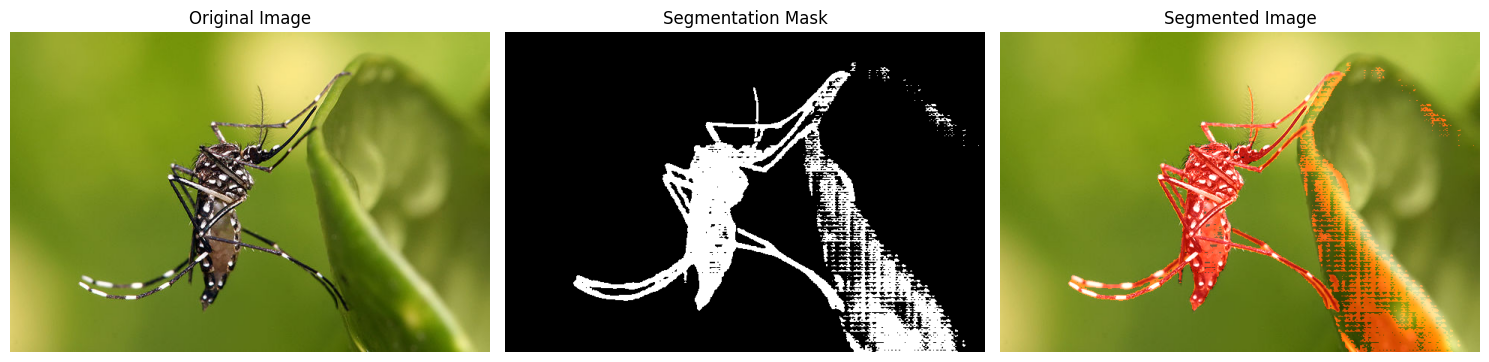

In [7]:
# Visualize segmentation results
segmented_image = segmenter.visualize(image, mask)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Segmentation Mask")

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.axis("off")
plt.title("Segmented Image")

plt.tight_layout()
plt.show()

## Segmentation Using Detection Results

The segmenter can also use detection results to improve segmentation accuracy. Here's how to combine detection and segmentation:

Weights file found at: C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\detection\culico-net-det-v1-nano.pt

Detection Results:
Mosquito 1: Confidence = 0.83, Box = (x=299.6, y=227.9, w=359.2, h=365.3)


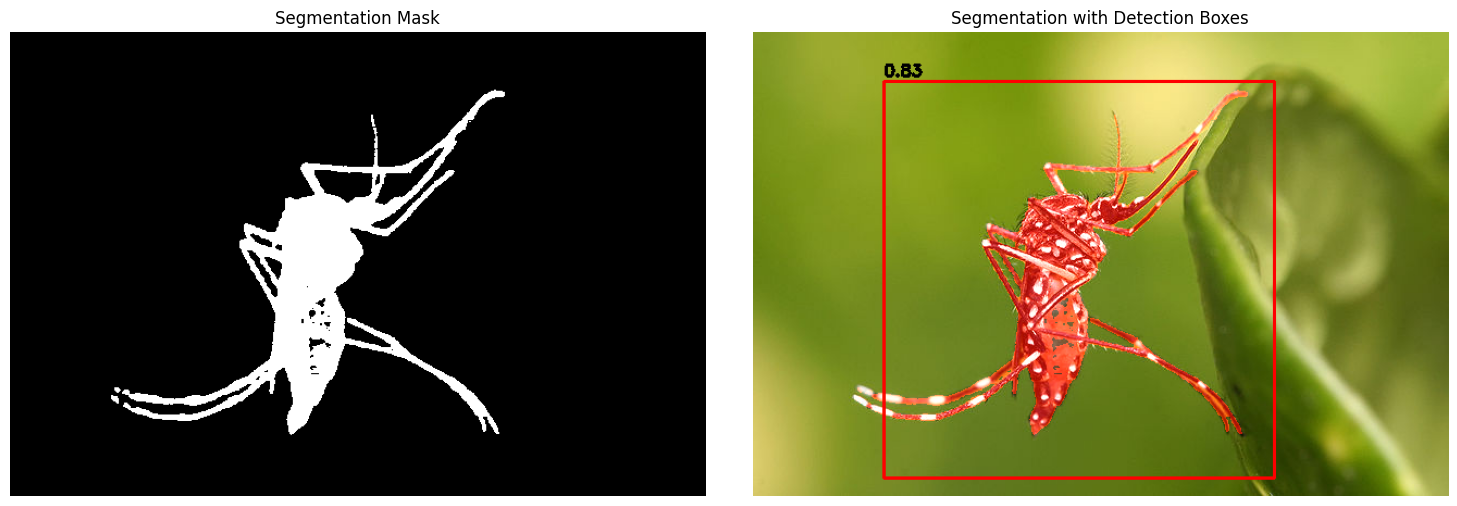

In [8]:
# Initialize detector
detector = MosquitoDetector(settings=settings, load_model=True)
# Load test image
image_path = str(Path("test_img") / "640px-Aedes_aegypti.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run detection
detections = detector.predict(image)

# Run segmentation with detection boxes
mask_with_boxes = segmenter.predict(image, detection_boxes=detections)
# Draw detections
annotated_image = detector.visualize(image, detections)

# Print detection results
print("\nDetection Results:")
for i, (x, y, w, h, conf) in enumerate(detections):
    print(f"Mosquito {i+1}: Confidence = {conf:.2f}, Box = (x={x:.1f}, y={y:.1f}, w={w:.1f}, h={h:.1f})")
# Visualize results
segmented_image_with_boxes = segmenter.visualize(annotated_image, mask_with_boxes)

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(mask_with_boxes, cmap="gray")
plt.axis("off")
plt.title("Segmentation Mask")


plt.subplot(1, 2, 2)
plt.imshow(segmented_image_with_boxes)
plt.axis("off")
plt.title("Segmentation with Detection Boxes")

plt.tight_layout()
plt.show()

In [9]:
metrics = segmenter.evaluate(mask_with_boxes, input_data=image)
print(metrics)

{'iou': 0.5018909670945998, 'precision': 0.5099197532477716, 'recall': 0.969582504970179, 'f1': 0.6683454100073658}


In [10]:
metrics_default = segmenter.evaluate(
    mask_with_boxes,
    mask_with_boxes,
)
print(metrics_default)

{'iou': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
